In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Import the Excel Package

In [2]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


### Load The Data Set

In [3]:
data = pd.read_excel("C:\\Users\\captr\\OneDrive\\Desktop\\marketing data.xls")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-11-05 00:00:00,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-08-04 00:00:00,0,6,...,2,7,1,0,0,0,0,1,0,SP


### Data Inspection

In [4]:
data.Dt_Customer.head()

0                6/16/14
1                6/15/14
2                5/13/14
3    2014-11-05 00:00:00
4    2014-08-04 00:00:00
Name: Dt_Customer, dtype: object

In [5]:
print(data.columns)


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [6]:
data[' Income '].head()


0    $84,835.00 
1    $57,091.00 
2    $67,267.00 
3    $32,474.00 
4    $21,474.00 
Name:  Income , dtype: object

In [7]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

### As we can see that the income column has 24 null values so we will fix it

In [8]:
data.columns = data.columns.str.strip()
data['Income'] = data['Income'].replace('[\$,]', '', regex=True).astype(float)
income_means = data.groupby(['Education', 'Marital_Status'])['Income'].transform('mean')
data['Income'] = data['Income'].fillna(income_means)

In [9]:
data.head(30)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,71691.0,0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,65324.0,0,1,2014-11-01 00:00:00,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,65324.0,0,1,2014-11-01 00:00:00,0,384,...,9,4,0,0,0,0,0,0,0,IND


In [10]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

### Woah !! Problem solved as you can see from above

In [11]:
type(data.Kidhome)

pandas.core.series.Series

### Creating  variables to represent the total number of children

In [12]:
data["total_Children"] = data.Kidhome+data.Teenhome
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,total_Children
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,1,0,0,0,0,0,1,0,SP,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,5,0,0,0,0,1,1,0,CA,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,0,0,0,0,0,0,0,US,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,7,0,0,0,0,0,0,0,AUS,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,7,1,0,0,0,0,1,0,SP,1


In [13]:
from datetime import datetime



### Creating variables to represent the age of the customer

In [14]:
current_age = datetime.now().year
data['Age'] = current_age - data['Year_Birth']
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,total_Children,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,0,0,0,1,0,SP,0,54
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,0,0,0,1,1,0,CA,0,63
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,0,0,0,US,1,66
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,0,0,0,0,0,AUS,2,57
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,1,0,0,0,0,1,0,SP,1,35


### Creating variables to represent the total spending of the customer

In [15]:
spending_cols=["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]

In [16]:
data["Total_Spending"]=data[spending_cols].sum(axis=1)
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,total_Children,Age,Total_Spending
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,0,0,1,0,SP,0,54,1190
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,0,0,1,1,0,CA,0,63,577
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,0,0,US,1,66,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,0,0,0,0,AUS,2,57,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,0,0,0,0,1,0,SP,1,35,91


In [17]:
data["Total_Spending"]=data.MntWines + data.MntFruits + data.MntMeatProducts + data.MntFishProducts + data.MntSweetProducts + data.MntGoldProds

In [18]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,total_Children,Age,Total_Spending
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,0,0,1,0,SP,0,54,1190
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,0,0,1,1,0,CA,0,63,577
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,0,0,US,1,66,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,0,0,0,0,AUS,2,57,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,0,0,0,0,1,0,SP,1,35,91


### Creating variables to represent the total Purchasing of the customer

In [19]:
data["Total_Purchases"]=data.NumDealsPurchases + data.NumWebPurchases + data.NumCatalogPurchases + data.NumStorePurchases
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,total_Children,Age,Total_Spending,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,0,1,0,SP,0,54,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,0,1,1,0,CA,0,63,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,0,US,1,66,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,0,0,0,AUS,2,57,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,0,0,0,1,0,SP,1,35,91,8


### Generated box plots and histograms to gain insights into the distributions and identify outliers.

In [20]:
%matplotlib inline

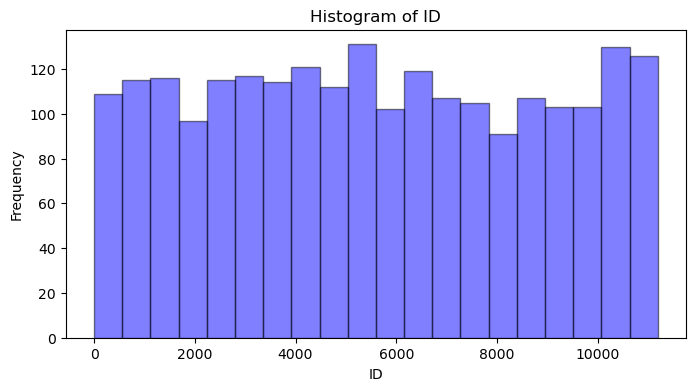

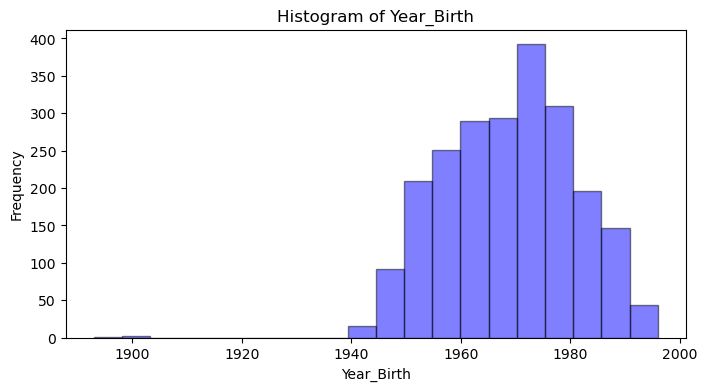

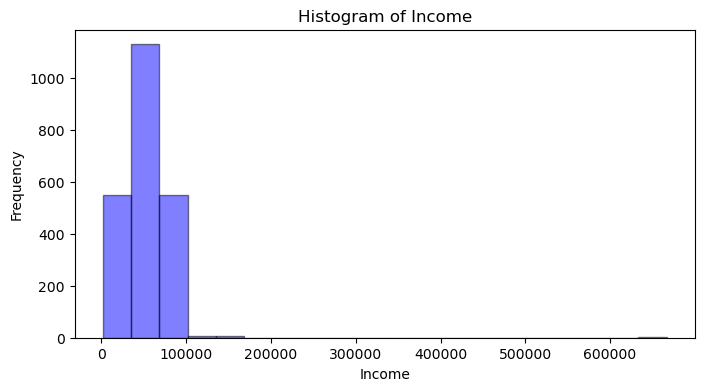

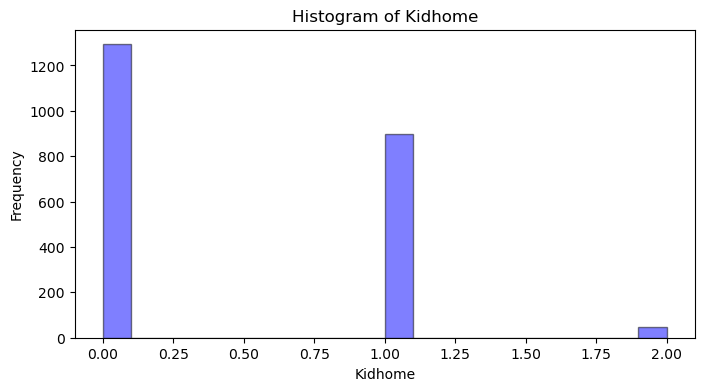

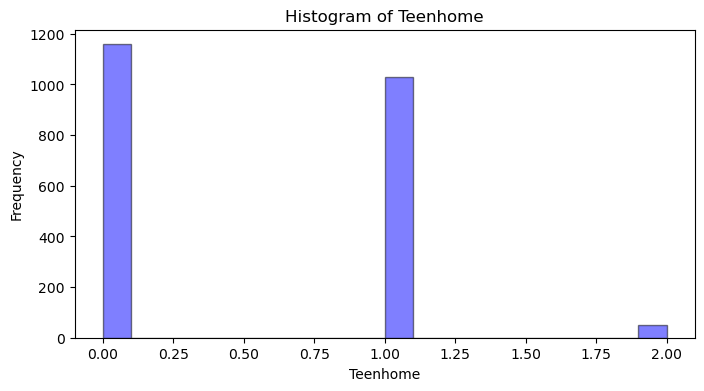

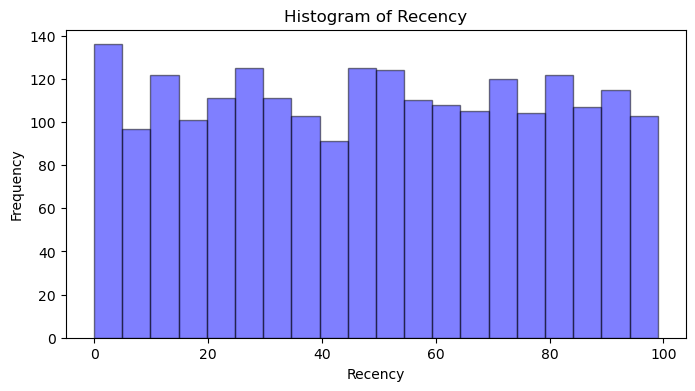

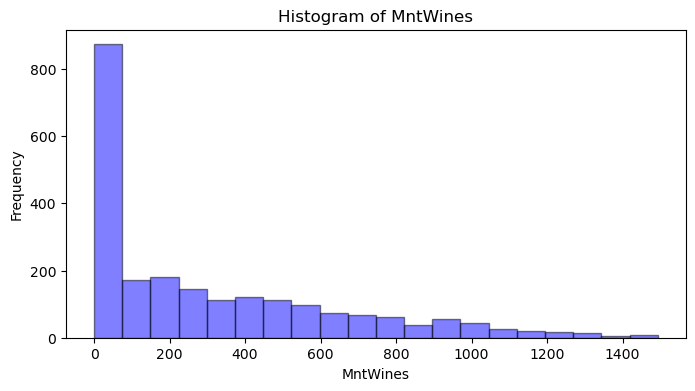

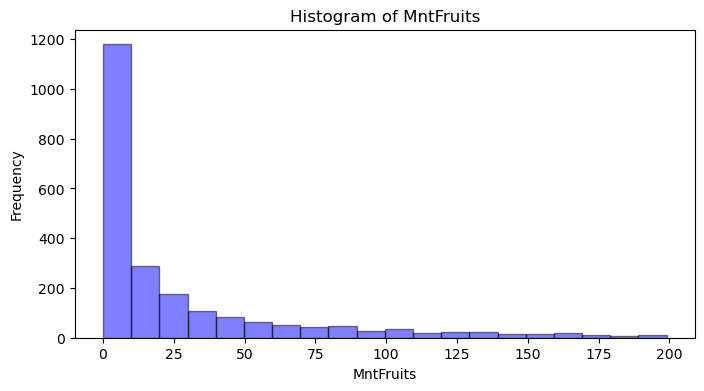

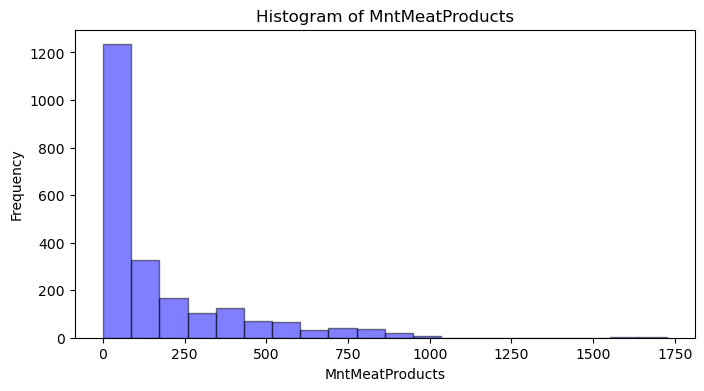

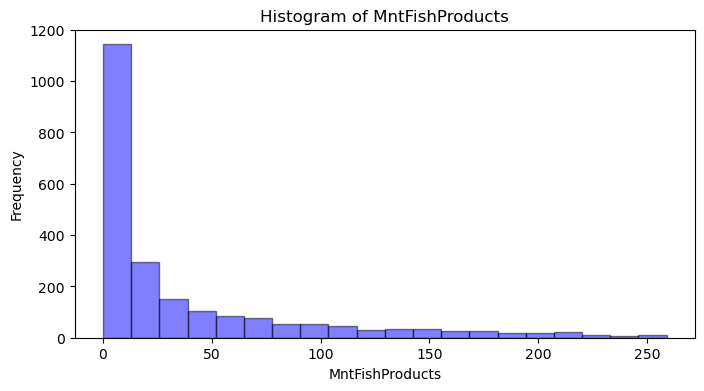

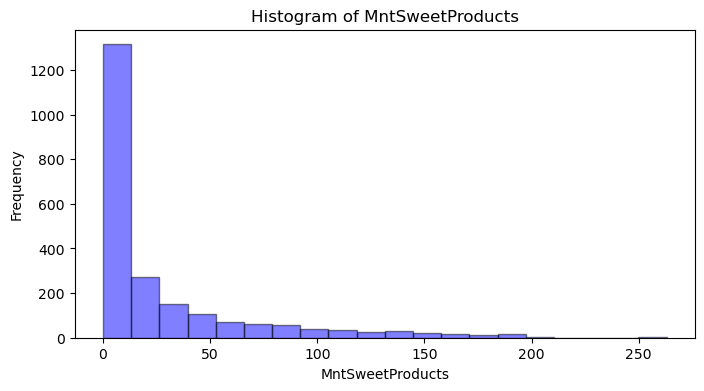

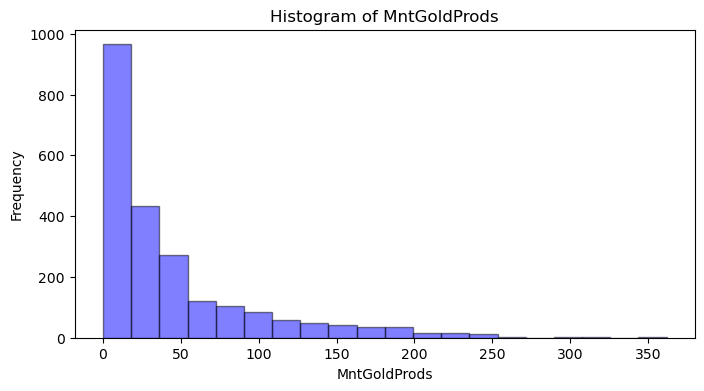

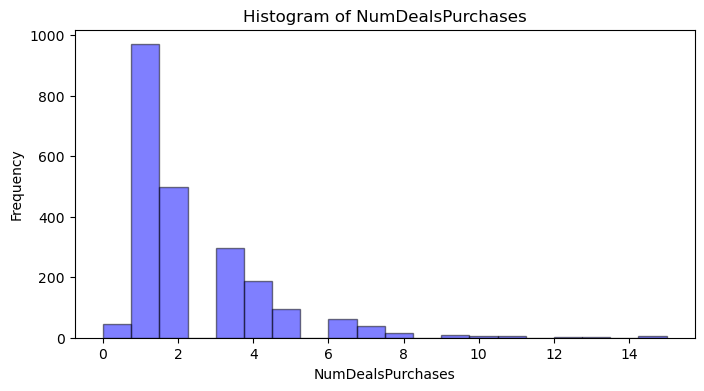

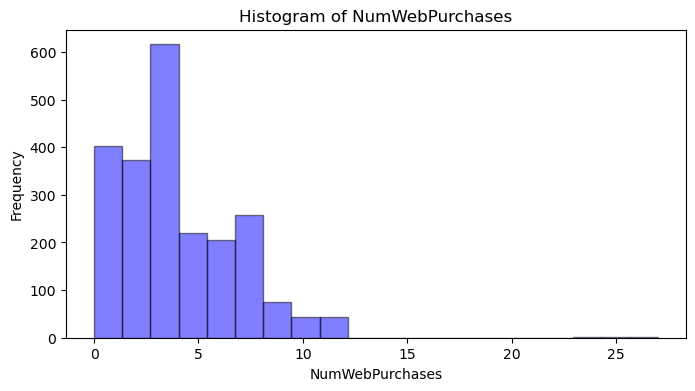

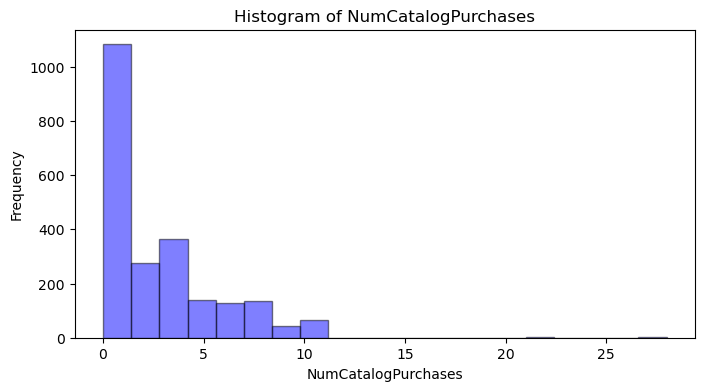

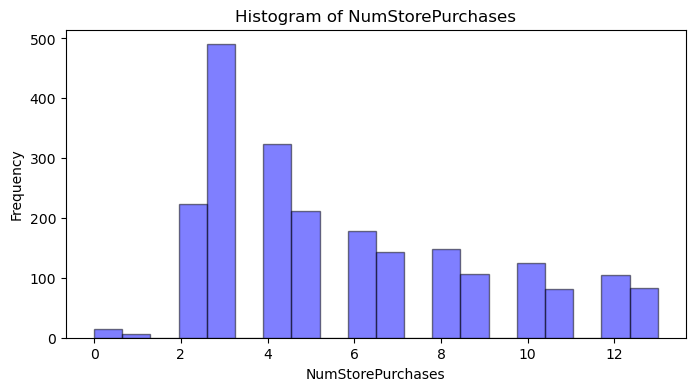

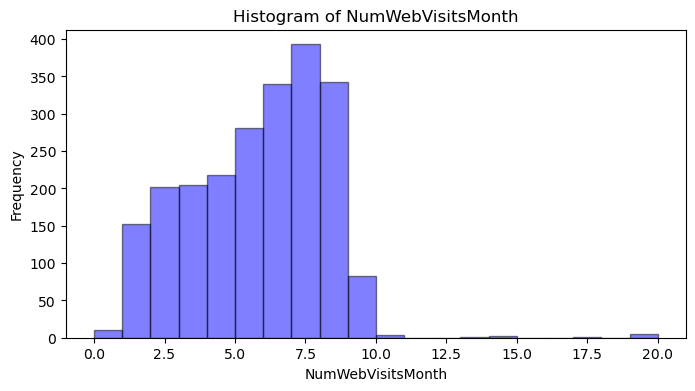

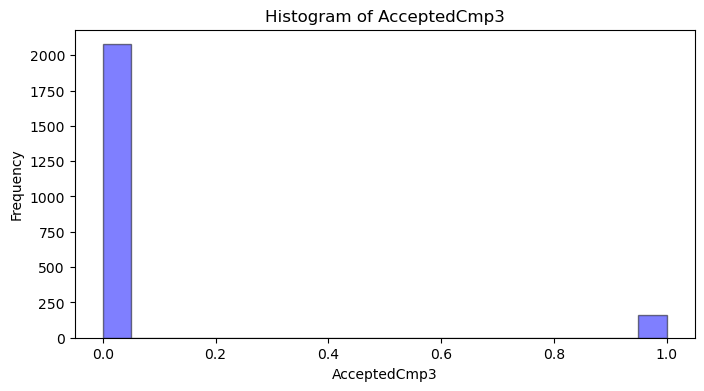

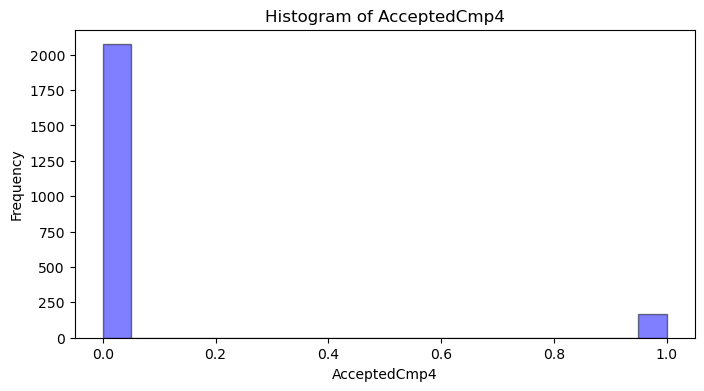

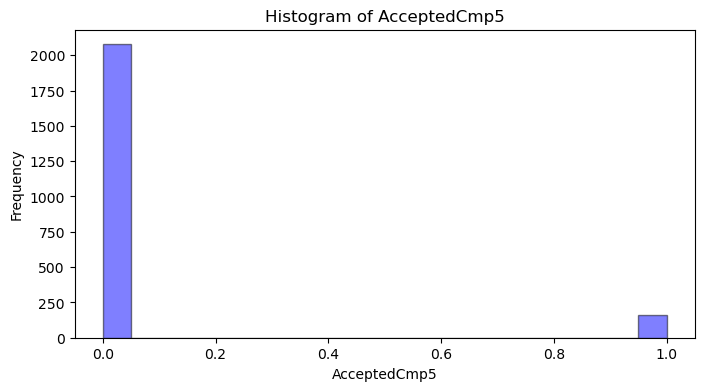

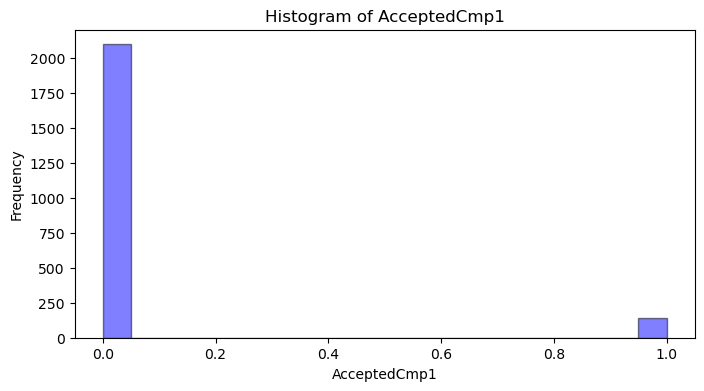

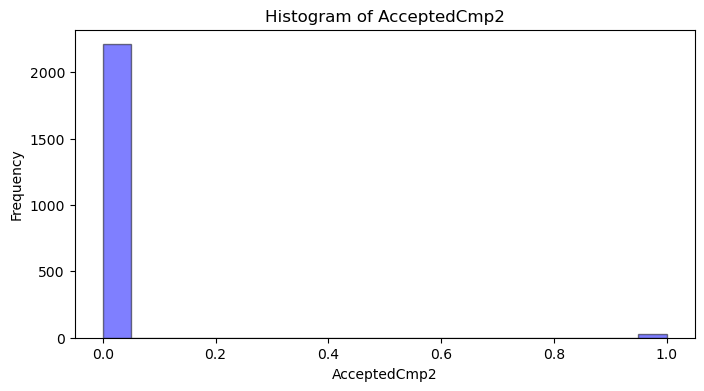

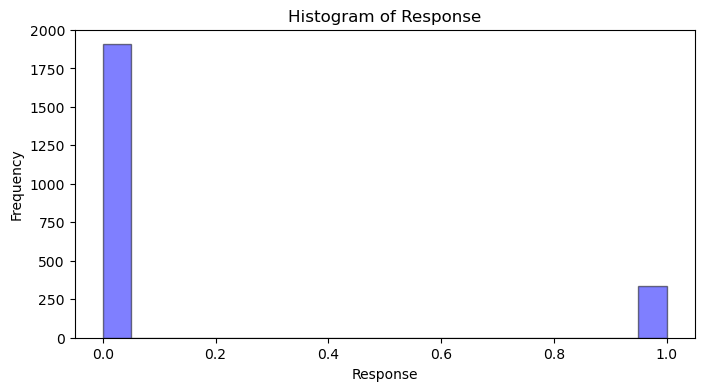

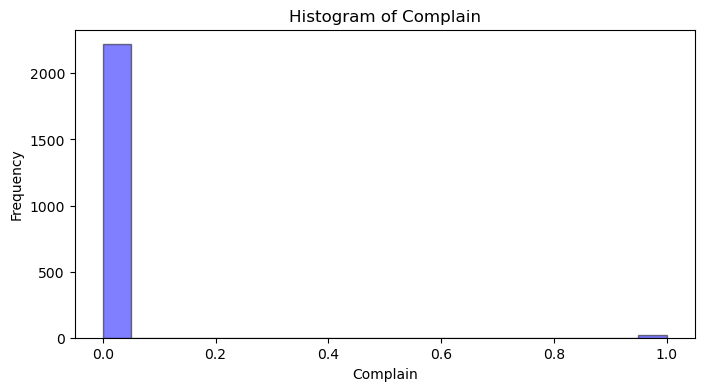

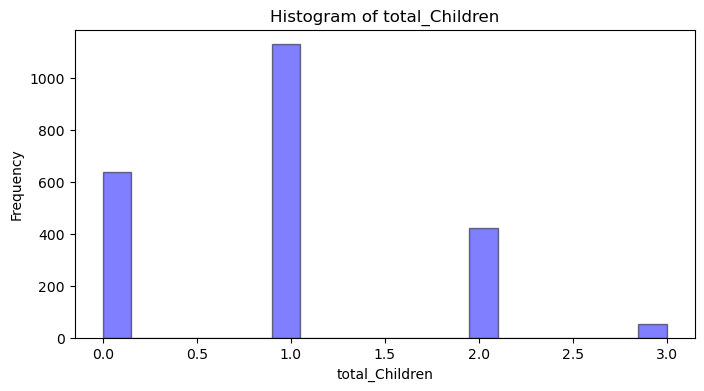

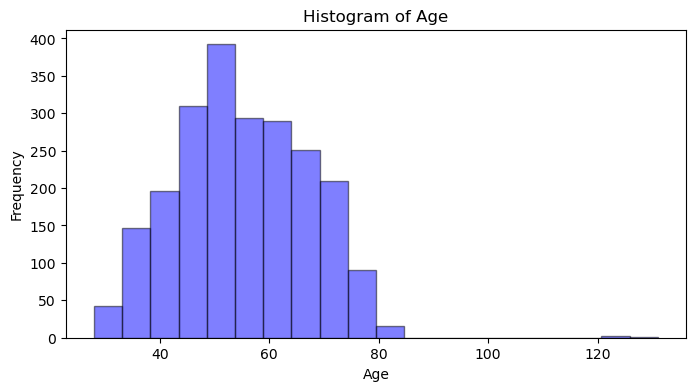

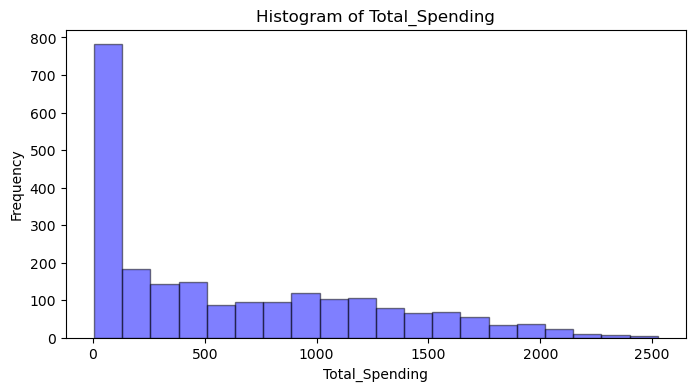

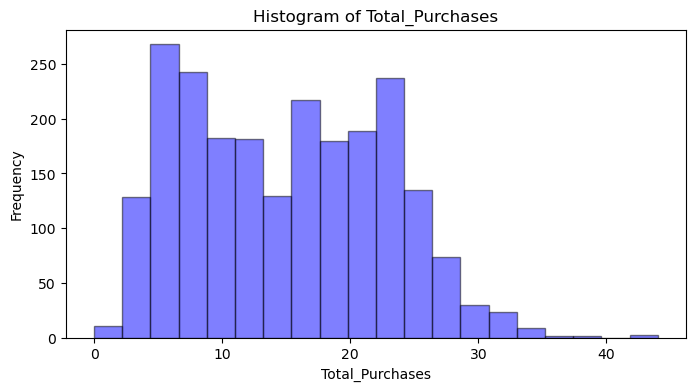

In [21]:
import matplotlib.pyplot as plt

# Selecting only the numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns


for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(data[col], bins=20, alpha=0.5, color='blue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


(array([0.05291005, 0.02645503, 0.05291005, 0.02645503, 0.02645503,
        0.05291005, 0.02645503, 0.02645503, 0.05291005, 0.02645503,
        0.02645503, 0.05291005, 0.02645503, 0.02645503, 0.05291005,
        0.02645503, 0.02645503, 0.05291005, 0.02645503, 0.05291005]),
 array([ 0.  ,  1.35,  2.7 ,  4.05,  5.4 ,  6.75,  8.1 ,  9.45, 10.8 ,
        12.15, 13.5 , 14.85, 16.2 , 17.55, 18.9 , 20.25, 21.6 , 22.95,
        24.3 , 25.65, 27.  ]),
 [<matplotlib.patches.Polygon at 0x2c085d3ab10>])

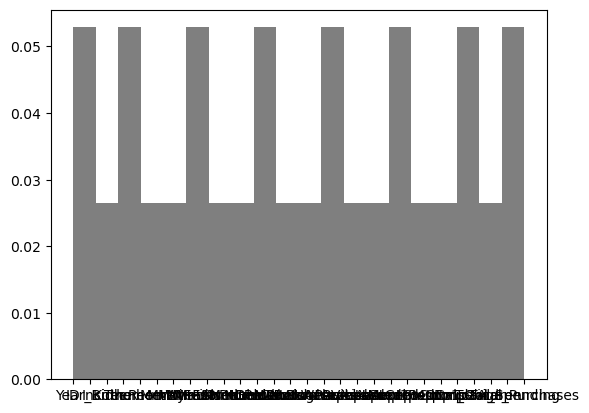

In [22]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
plt.hist(numeric_columns,bins=20,alpha=0.5,density=True,histtype="stepfilled",color="black")

C:\Users\captr\AppData\Local\Temp\ipykernel_13208\2962160218.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 4))


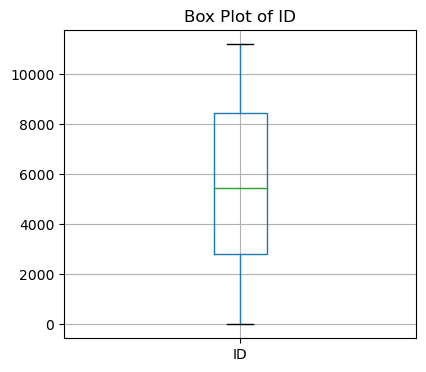

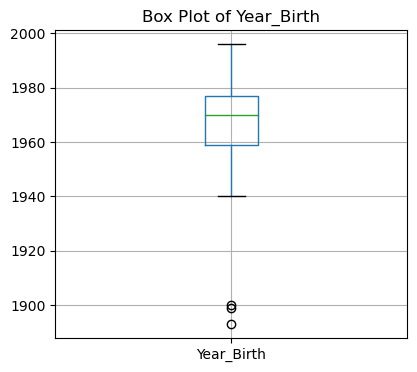

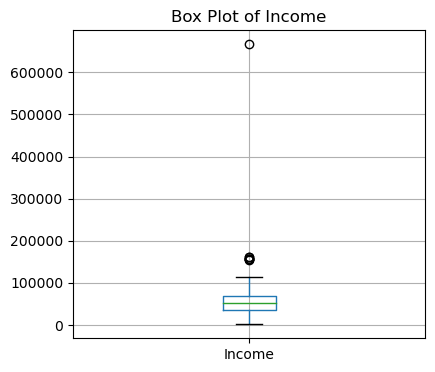

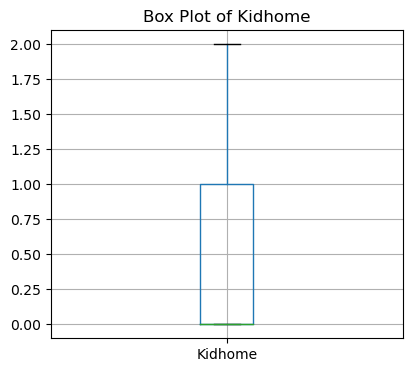

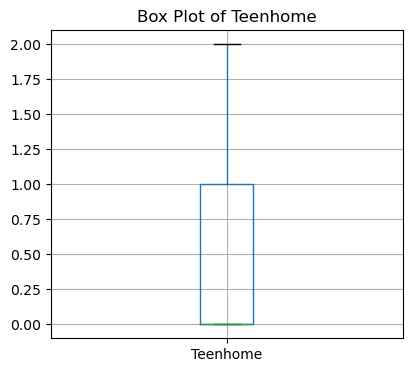

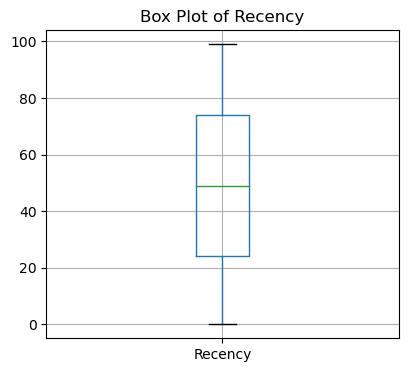

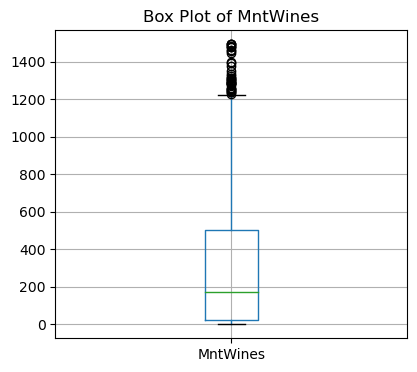

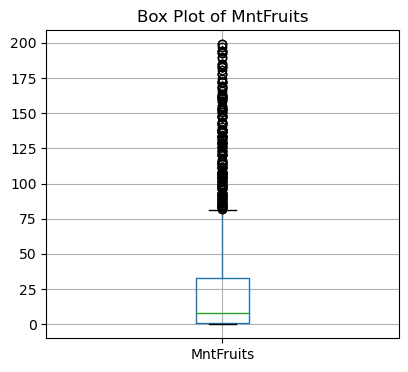

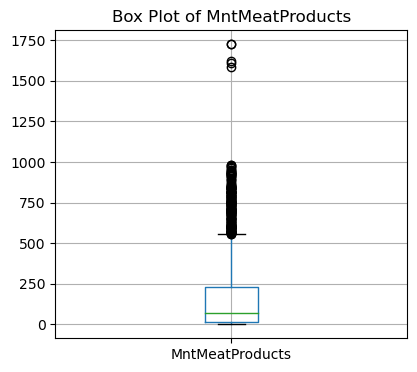

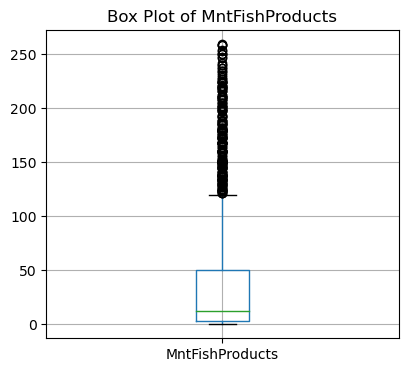

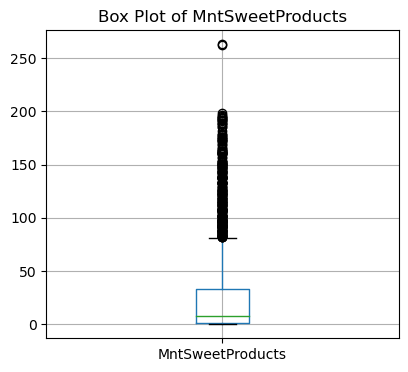

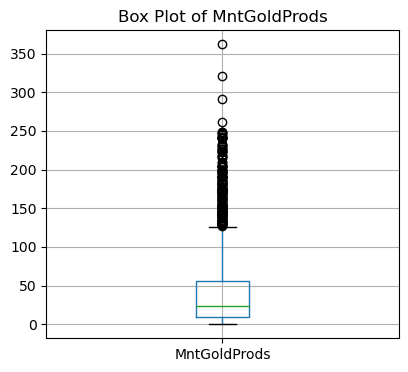

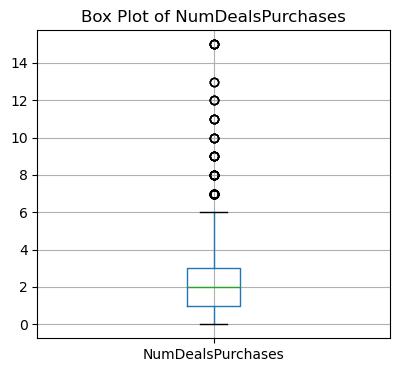

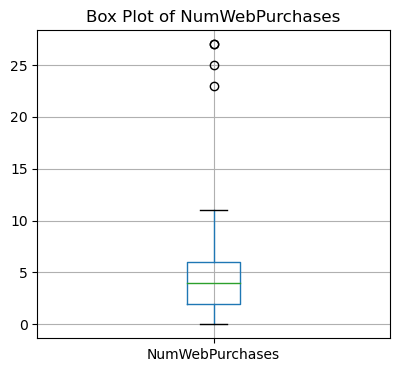

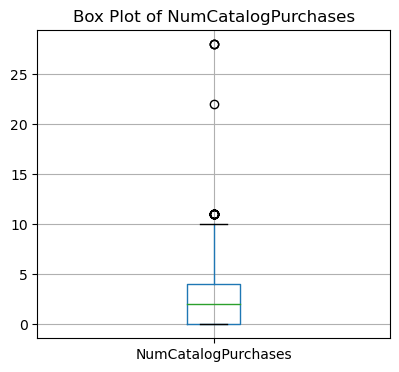

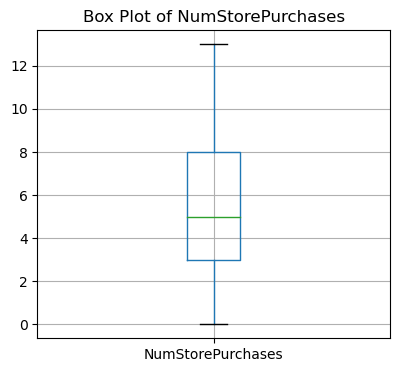

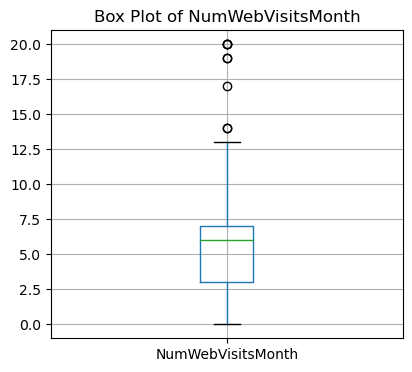

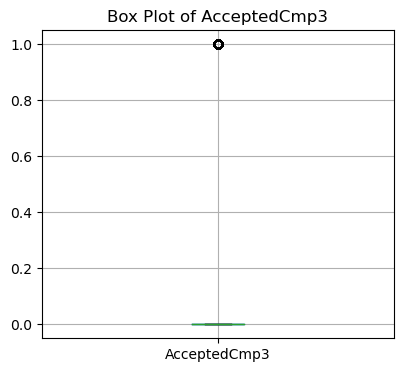

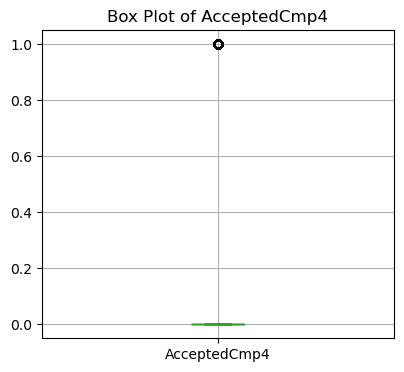

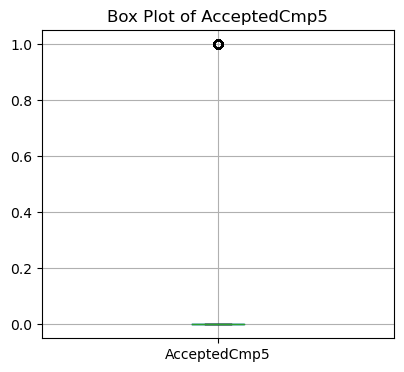

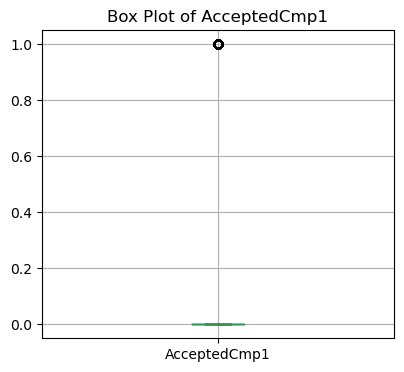

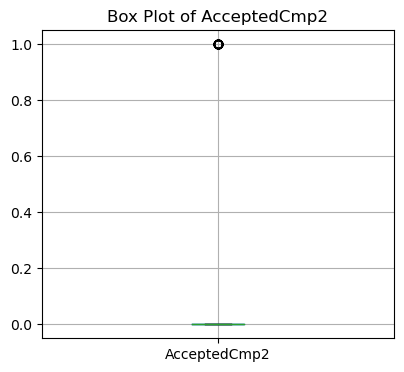

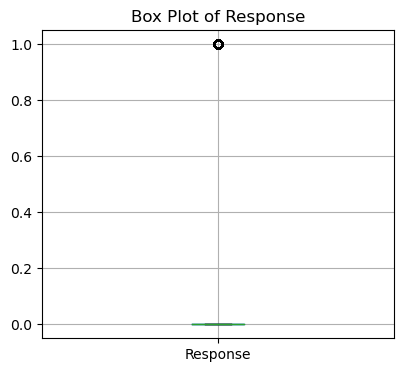

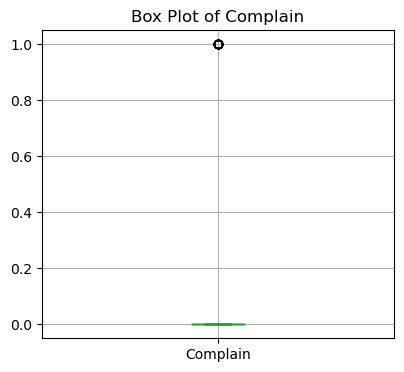

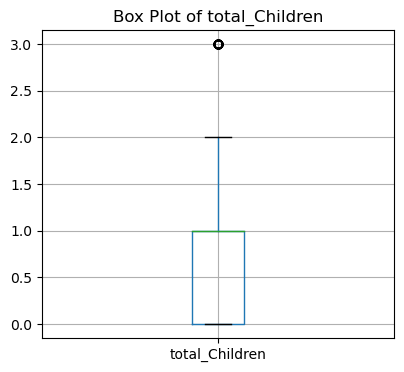

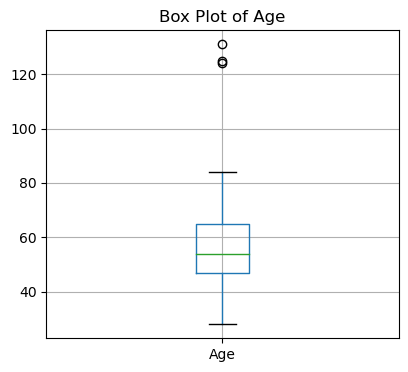

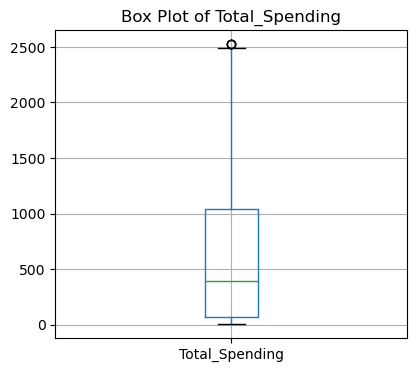

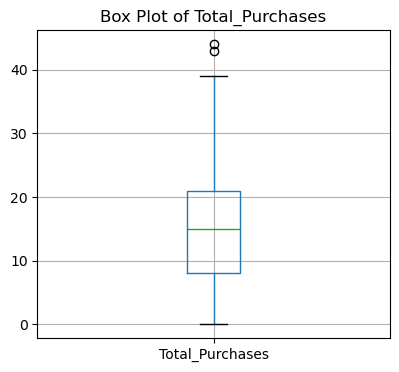

In [23]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    data.boxplot(column=col)
    plt.title(f'Box Plot of {col}')


### Applied ordinal and one-hot encoding based on the various types of categorical variables

In [24]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [25]:
ordinal_columns = ['Education'] 
nominal_columns = ['Marital_Status','Country'] 

In [26]:
ordinal_encoder = OrdinalEncoder()
data[ordinal_columns] = ordinal_encoder.fit_transform(data[ordinal_columns])

In [27]:
onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
nominal_encoded = onehot_encoder.fit_transform(data[nominal_columns])


C:\Users\captr\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
nominal_encoded_df = pd.DataFrame(nominal_encoded, columns=onehot_encoder.get_feature_names_out(nominal_columns))

In [29]:
data = pd.concat([data, nominal_encoded_df], axis=1)
data.drop(columns=nominal_columns, inplace=True)

In [30]:
data.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,2.0,84835.0,0,0,6/16/14,0,189,104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1961,2.0,57091.0,0,0,6/15/14,0,464,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10476,1958,2.0,67267.0,0,1,5/13/14,0,134,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1386,1967,2.0,32474.0,1,1,2014-11-05 00:00:00,0,10,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5371,1989,2.0,21474.0,1,0,2014-08-04 00:00:00,0,6,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Generated a heatmap to illustrate the correlation between different pairs of variables

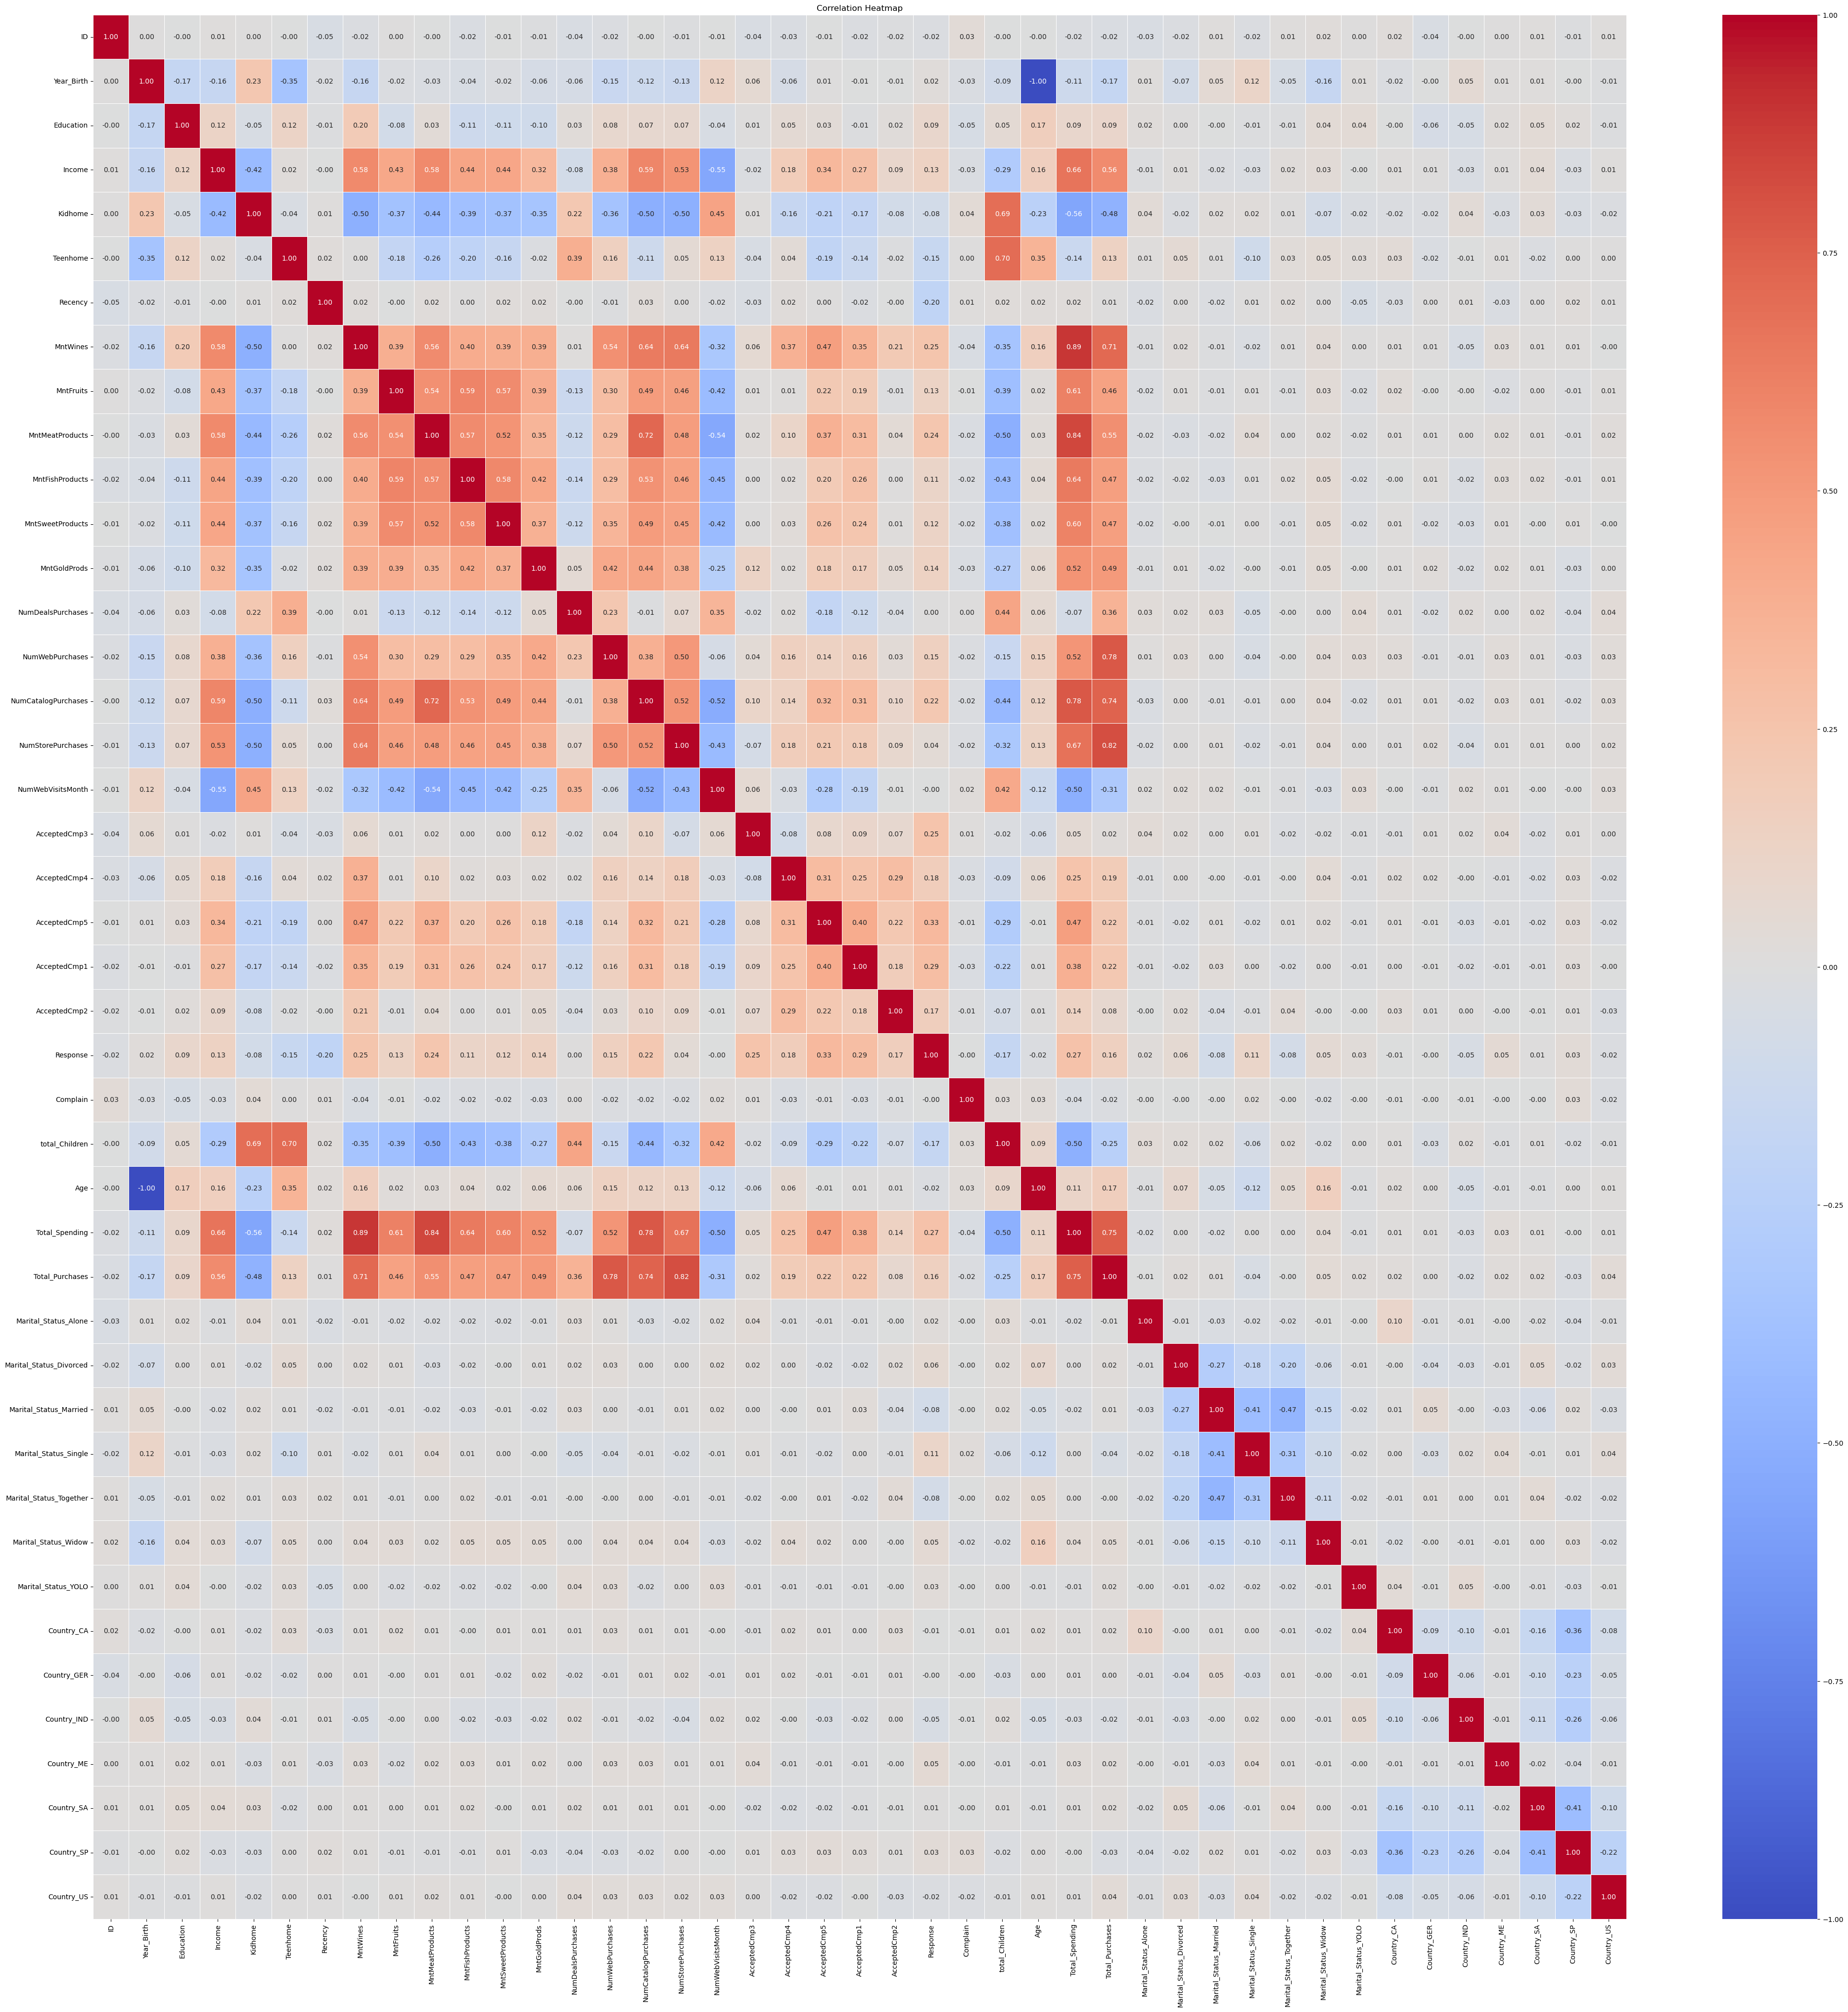

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# correlation matrix
correlation_matrix = numeric_data.corr()

# heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



# Hypothesis Testing 

### i) Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences

In [33]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


age_instore_corr, age_instore_pval = stats.spearmanr(data['Age'], data['NumStorePurchases'])
age_online_corr, age_online_pval = stats.spearmanr(data['Age'], data['NumWebPurchases'])

print(f"Spearman correlation between Age and In-store Purchases: {age_instore_corr:.2f}, p-value: {age_instore_pval:.4f}")
print(f"Spearman correlation between Age and Online Purchases: {age_online_corr:.2f}, p-value: {age_online_pval:.4f}")

# Regression analysis for age and shopping preferences
instore_model = smf.ols('NumStorePurchases ~ Age', data=data).fit()
online_model = smf.ols('NumWebPurchases ~ Age', data=data).fit()

print("\nIn-store Purchases Regression Summary:\n", instore_model.summary())
print("\nOnline Purchases Regression Summary:\n", online_model.summary())


Spearman correlation between Age and In-store Purchases: 0.17, p-value: 0.0000
Spearman correlation between Age and Online Purchases: 0.16, p-value: 0.0000

In-store Purchases Regression Summary:
                             OLS Regression Results                            
Dep. Variable:      NumStorePurchases   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     37.44
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           1.11e-09
Time:                        13:21:28   Log-Likelihood:                -5800.2
No. Observations:                2240   AIC:                         1.160e+04
Df Residuals:                    2238   BIC:                         1.162e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
             

### ii) Customers with children likely experience time constraints, making online shopping a more convenient option.

In [35]:
import scipy.stats as stats
import statsmodels.formula.api as smf


# Step 1: Perform Spearman's correlation test
children_online_corr, children_online_pval = stats.spearmanr(data["total_Children"], data['NumWebPurchases'])

print(f"Spearman correlation between Total Children and Online Purchases: {children_online_corr:.2f}, p-value: {children_online_pval:.4f}")

# Step 2: Regression analysis for Total Children and Online Purchases
online_model = smf.ols('NumWebPurchases ~ total_Children', data=data).fit()

print("\nOnline Purchases Regression Summary:\n", online_model.summary())


Spearman correlation between Total Children and Online Purchases: -0.19, p-value: 0.0000

Online Purchases Regression Summary:
                             OLS Regression Results                            
Dep. Variable:        NumWebPurchases   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     48.99
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           3.39e-12
Time:                        13:28:41   Log-Likelihood:                -5442.9
No. Observations:                2240   AIC:                         1.089e+04
Df Residuals:                    2238   BIC:                         1.090e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]

### iii) Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

In [36]:
import scipy.stats as stats
import statsmodels.formula.api as smf

# Step 1: Perform Spearman's correlation between store and alternative channels
store_online_corr, store_online_pval = stats.spearmanr(data['NumStorePurchases'], data['NumWebPurchases'])
store_catalog_corr, store_catalog_pval = stats.spearmanr(data['NumStorePurchases'], data['NumCatalogPurchases'])

print(f"Spearman correlation between Store and Online Purchases: {store_online_corr:.2f}, p-value: {store_online_pval:.4f}")
print(f"Spearman correlation between Store and Catalog Purchases: {store_catalog_corr:.2f}, p-value: {store_catalog_pval:.4f}")

# Step 2: Multiple regression analysis to evaluate impact on store sales
cannibalization_model = smf.ols('NumStorePurchases ~ NumWebPurchases + NumCatalogPurchases', data=data).fit()

print("\nMultiple Regression Summary for Store Purchases:\n", cannibalization_model.summary())


Spearman correlation between Store and Online Purchases: 0.67, p-value: 0.0000
Spearman correlation between Store and Catalog Purchases: 0.71, p-value: 0.0000

Multiple Regression Summary for Store Purchases:
                             OLS Regression Results                            
Dep. Variable:      NumStorePurchases   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     681.7
Date:                Fri, 01 Nov 2024   Prob (F-statistic):          6.63e-232
Time:                        13:30:55   Log-Likelihood:                -5285.7
No. Observations:                2240   AIC:                         1.058e+04
Df Residuals:                    2237   BIC:                         1.059e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         


# Data Visualisation

### Identifying the top-performing products and those with the lowest revenue.

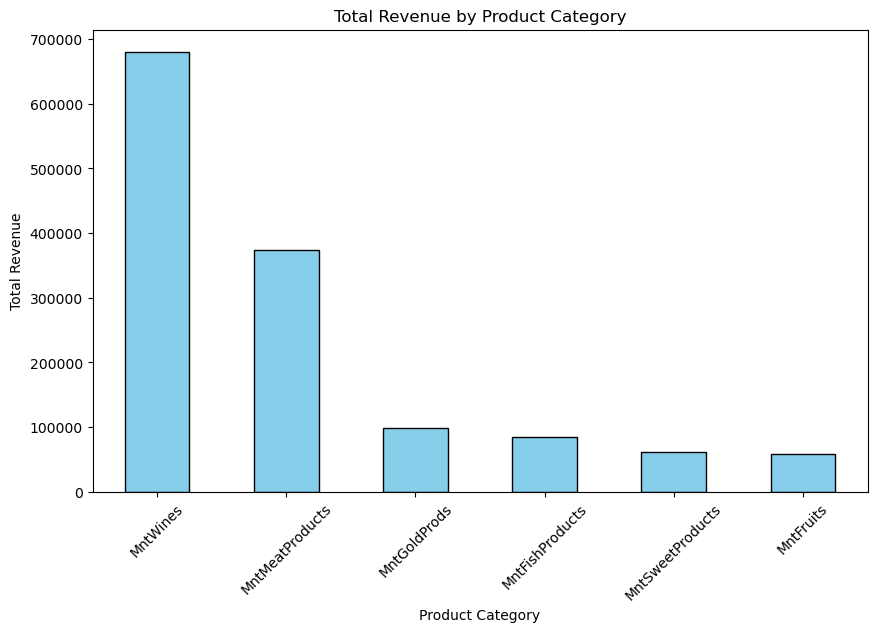

In [45]:
import matplotlib.pyplot as plt

# Calculate total revenue for each product
product_revenue = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Sort revenues in descending order for clear visualization
product_revenue = product_revenue.sort_values(ascending=False)

# Plot the revenue for each product
plt.figure(figsize=(10, 6))
product_revenue.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


### Examining if there is a correlation between customers' age and the acceptance rate of the last campaign

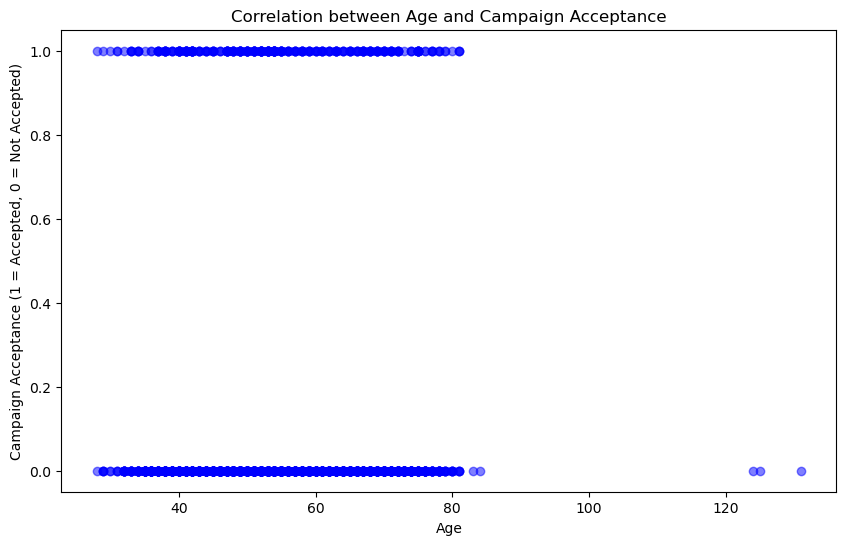

Spearman Correlation between Age and Campaign Acceptance: -0.02, p-value: 0.3268
There is no statistically significant correlation between age and campaign acceptance.


In [47]:
import matplotlib.pyplot as plt
import scipy.stats as stats


from datetime import datetime
data['Age'] = datetime.now().year - data['Year_Birth']

# Step 1: Calculated acceptance rate by age group
age_response = data.groupby('Age')['Response'].mean()

# Step 2: Scatter plotted for visual analysis
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Response'], alpha=0.5, color='blue')
plt.title("Correlation between Age and Campaign Acceptance")
plt.xlabel("Age")
plt.ylabel("Campaign Acceptance (1 = Accepted, 0 = Not Accepted)")
plt.show()

# Step 4: Calculate Spearman correlation to measure the relationship
correlation, p_value = stats.spearmanr(data['Age'], data['Response'])
print(f"Spearman Correlation between Age and Campaign Acceptance: {correlation:.2f}, p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant correlation between age and campaign acceptance.")
else:
    print("There is no statistically significant correlation between age and campaign acceptance.")


### Determining the country with the highest number of customers who accepted the last campaign

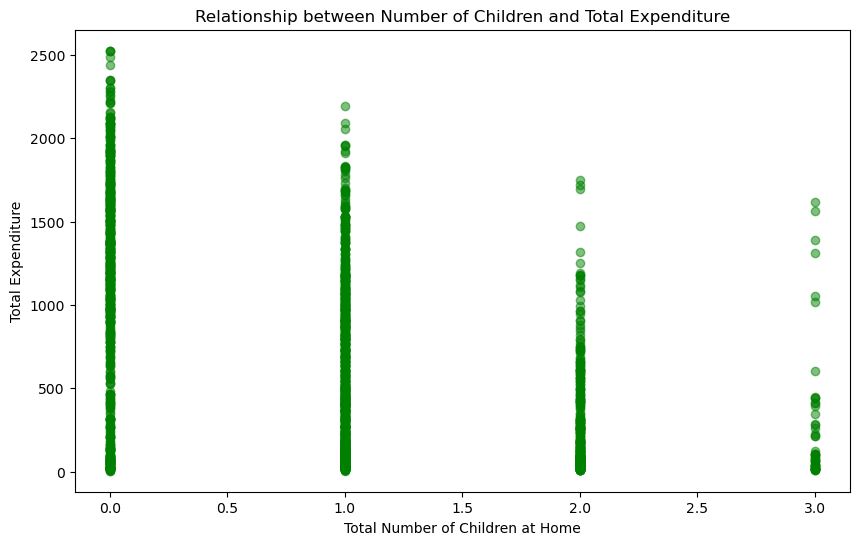

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(data['total_Children'], data['Total_Spending'], alpha=0.5, color='green')
plt.title("Relationship between Number of Children and Total Expenditure")
plt.xlabel("Total Number of Children at Home")
plt.ylabel("Total Expenditure")
plt.show()

### Investigating if there is a discernible pattern in the number of children at home and the total expenditure

In [55]:
correlation, p_value = stats.spearmanr(data['total_Children'], data['Total_Spending'])
print(f"Spearman Correlation between Total Children and Total Expenditure: {correlation:.2f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("There is a statistically significant relationship between the number of children at home and total expenditure.")
else:
    print("There is no statistically significant relationship between the number of children at home and total expenditure.")

Spearman Correlation between Total Children and Total Expenditure: -0.48, p-value: 0.0000
There is a statistically significant relationship between the number of children at home and total expenditure.


### Analyzed the educational background of customers who lodged complaints in the last two years

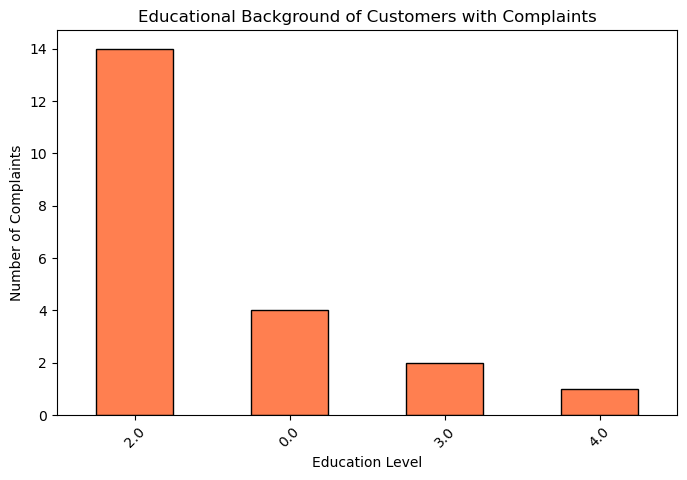

Education Background Counts for Complaints:
 Education
2.0    14
0.0     4
3.0     2
4.0     1
Name: count, dtype: int64


In [56]:
import matplotlib.pyplot as plt


complaint_data = data[data['Complain'] == 1]


education_complaints = complaint_data['Education'].value_counts()


plt.figure(figsize=(8, 5))
education_complaints.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Educational Background of Customers with Complaints")
plt.xlabel("Education Level")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.show()


print("Education Background Counts for Complaints:\n", education_complaints)
